In [1]:
from organelle_transport_analysis import kymographs, directions, velocities, plotting
import matplotlib.pyplot as plt
import json

C:\Users\r77121ag.DS\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
# Custom time and distance parameters
time_c = 0.1563
distance_c = 0.092

In [3]:
# Importing distances to soma for each kymograph
f = open('head_distances_ida1.json')
head_distances_ida1 = json.load(f)
f.close()

In [4]:
# Importing and preparing the data
ida1 = kymographs.get_kymo("IDA1_result_transposed.csv", head_distances_ida1)
ida1 = kymographs.remove_duplicates(ida1)
ida1 = kymographs.adjust_units(ida1, distance_c, time_c)

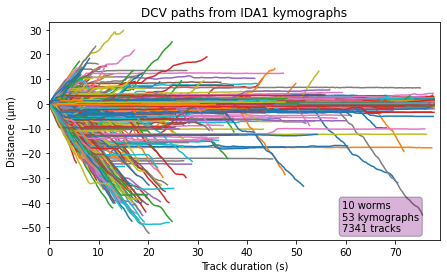

In [5]:
# Plotting all tracks from one point
plotting.draw_tracks(ida1, 'DCV paths from IDA1 kymographs', 10, 53, len(ida1), 'TEST_ida1.png')

In [6]:
# Segmenting the data according to distance to soma
ida1_up_to_200 = kymographs.get_kymo_by_distance(ida1, 0, 200)
ida1_200_to_350 = kymographs.get_kymo_by_distance(ida1, 200, 350)
ida1_350_to_500 = kymographs.get_kymo_by_distance(ida1, 350, 500)
ida1_500_to_650 = kymographs.get_kymo_by_distance(ida1, 500, 650)
ida1_650_to_800 = kymographs.get_kymo_by_distance(ida1, 650, 800)
ida1_over_800 = kymographs.get_kymo_by_distance(ida1, 800, 100000) # very large number

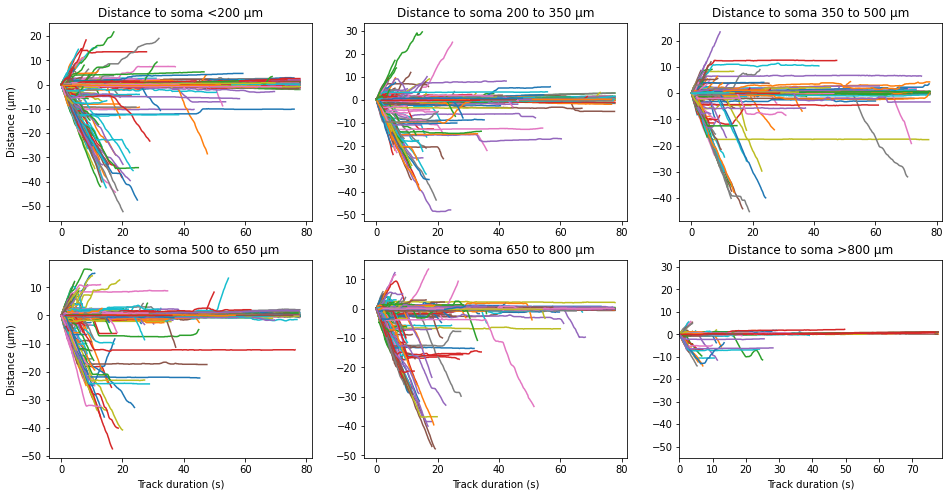

In [7]:
# Plotting the segmented data
figure, axis = plt.subplots(2, 3,figsize=(16, 8))
plt.title('DCV paths from IDA1 kymographs')  
plt.xlim([0, 79])
plt.ylim([-55, 33])
plotting.draw_tracks_segment(ida1_up_to_200,'Distance to soma <200 \u03bcm', axis[0, 0])
axis[0, 0].set_ylabel('Distance (\u03bcm)')
plotting.draw_tracks_segment(ida1_200_to_350,'Distance to soma 200 to 350 \u03bcm', axis[0, 1])
plotting.draw_tracks_segment(ida1_350_to_500,'Distance to soma 350 to 500 \u03bcm', axis[0, 2])
plotting.draw_tracks_segment(ida1_500_to_650,'Distance to soma 500 to 650 \u03bcm', axis[1, 0])
axis[1, 0].set_xlabel('Track duration (s)')
axis[1, 0].set_ylabel('Distance (\u03bcm)')
plotting.draw_tracks_segment(ida1_650_to_800,'Distance to soma 650 to 800 \u03bcm', axis[1, 1])
axis[1, 1].set_xlabel('Track duration (s)')
plotting.draw_tracks_segment(ida1_over_800,'Distance to soma >800 \u03bcm', axis[1, 2])
axis[1, 2].set_xlabel('Track duration (s)')

plt.show()

In [8]:
# Segmenting each track into left(retrograde)/right(anterograde)/stationary parts
directions_ida1 = directions.calculate_movement_directions(ida1, 0.6444, 2) # Using custom thresholds

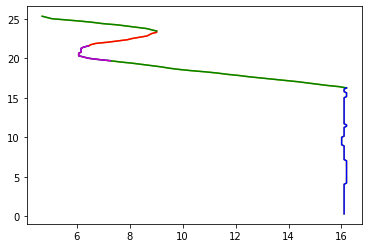

In [9]:
# Plotting single segmented track (green - left, red - right, magenta - stationary, blue - stationary (corners))
plotting.draw_all_segments_with_rest(6211, directions_ida1, ida1)

In [10]:
# Calculating velocities for each left and right segment
velocities_ida1 = velocities.calculate_velocities(directions_ida1)

In [11]:
# Normalising segment velocities into a single array for left and right directions
combined_velocities_left_ida1, combined_velocities_right_ida1 = velocities.combine_velocities(velocities_ida1, 0.3) # Velocity larger than 0.3

In [12]:
# Comparison of velocities between 2 strains using Kolmogorov-Smirnov test 
#from scipy.stats import ks_2samp

#statistic, p_value = ks_2samp(combined_velocities_right_ida1,combined_velocities_right_klc1)

#print(f'KS statistic: {statistic}')
#print(f'P-value: {p_value}')

#statistic, p_value = ks_2samp(combined_velocities_left_ida1,combined_velocities_left_klc1)

#print(f'KS statistic: {statistic}')
#print(f'P-value: {p_value}')

In [13]:
# Combining left and right velocities into a single array
combined_velocities_ida1 = combined_velocities_left_ida1
combined_velocities_ida1.extend(combined_velocities_right_ida1)

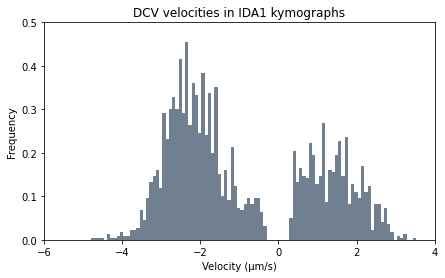

In [14]:
# Plotting all velocities
figure, ax = plt.subplots(figsize=(7, 4))

plt.hist(combined_velocities_ida1, bins=100, color='slategrey', density=True)
plt.xlim(-6, 4)
plt.ylim(0, 0.5)
plt.xlabel('Velocity (\u03bcm/s)')
plt.ylabel('Frequency')
plt.title('DCV velocities in IDA1 kymographs')
plt.savefig('TEST_ida1_velocities.png',dpi=300)
plt.show()

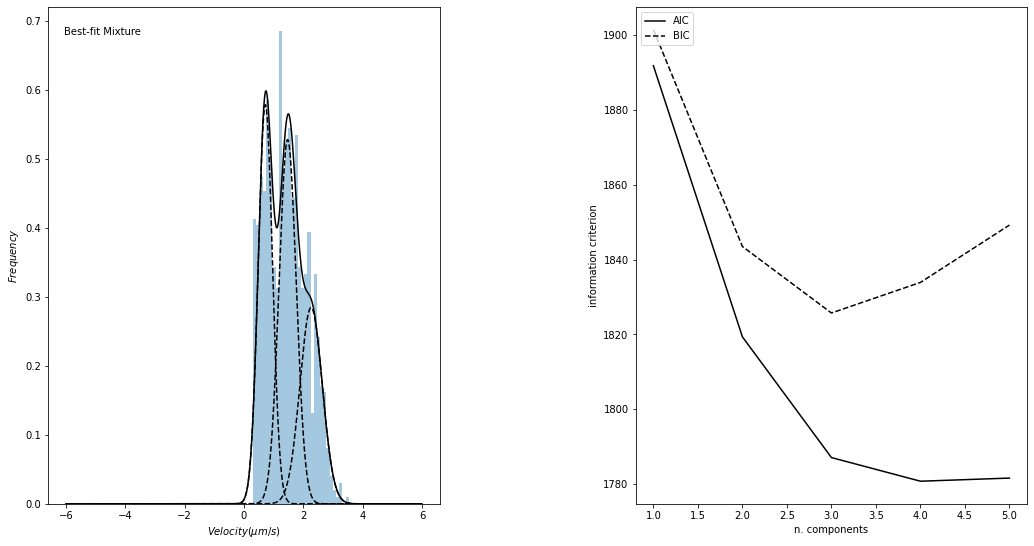

<Figure size 432x288 with 0 Axes>

In [15]:
# Finding the best fit for the Gaussian Mixture Model
plotting.GMM_best_fit(combined_velocities_right_ida1)
plt.savefig('TEST_ida1_right_GMM_best.png',dpi=300)